In [1]:
import numpy as np 
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-pastel")

%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 

df = pd.DataFrame(wine_quality.data.original)

#Replacing Yes/No in the target variable (Attrition) with 1/0
df['color'] = df['color'].map({'red':0, 'white':1})

print(df)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  

In [3]:
class Perceptron():
    # initialize
    def __init__(self) -> None:
        self.X = None
        self.variables = None
        self.y = None
        self.predictor = None
        self.n = None
        self.p = None
        self.bias = None
        self.gamma = None
        self.max_iter = None
        self.eta = None

        self.weights = None
        self.weights_history = []
        self.loss_history = [np.inf]

    def sign(self, x, y):
        if x@y>0:
            return 1
        else:
            return -1
        
    def loss(self):
        return sum(0.5*(self.sign(self.weights, x) - self.y[i])**2 for i, x in enumerate(self.X))

    def grad_approx(self, x, y):
        return (self.sign(self.weights, x) - y) * x

    def update_w(self, id):
        self.weights = self.weights - self.gamma * self.grad_approx(self.X[id], self.y[id])
        self.weights_history.append(self.weights)
        return 

        # model fitting
    def fit(self, X, y, bias=True, gamma=0.01, max_iter=100, eta=0.001):
        self.variables = X.columns
        self.predictor = y.name
        
        X = X.to_numpy()
        y = y.to_numpy()
        if bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        self.X = X
        self.y = y
        self.n = X.shape[0]
        self.p = X.shape[1]
        self.bias = bias
        self.gamma = gamma
        self.max_iter = max_iter
        self.eta = eta
        
        weights = np.random.rand(self.p)
        self.weights = weights
        self.weights_history.append(weights)

        for i in range(1, max_iter+1):
            random_id = np.random.randint(self.n)
            weights = self.update_w(random_id)
            L = self.loss()
            self.loss_history.append(L)
            if i >= self.max_iter:
                break
                
    # predict new data
    def prediction(self, X, weights):
        X = X.to_numpy()
        if self.bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        y_hat = [self.sign(x, weights) for x in X]
        return y_hat

In [4]:
#Create a function which takes the dataset as input and ouputs the processed dataset
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['sulphates'] = le.fit_transform(res_df['sulphates'])
    res_df['total_sulfur_dioxide'] = le.fit_transform(res_df['total_sulfur_dioxide'])
    res_df['residual_sugar'] = le.fit_transform(res_df['residual_sugar'])
    res_df['pH'] = le.fit_transform(res_df['pH'])
    res_df['chlorides'] = le.fit_transform(res_df['chlorides'])
    res_df['density'] = le.fit_transform(res_df['density'])
    res_df['citric_acid'] = le.fit_transform(res_df['citric_acid'])
    res_df['fixed_acidity'] = le.fit_transform(res_df['fixed_acidity'])
    return res_df

#Run the function on the desired dataset
encoded_df = preprocessor(df)

In [5]:
#Selecting features
X = encoded_df.drop(['color'],axis =1)
y = encoded_df['color']

In [6]:
#Standardizing features
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))

#Confirm the new mean and standard deviation of the dataset
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 0)


Text(0, 0.5, 'Alcohol')

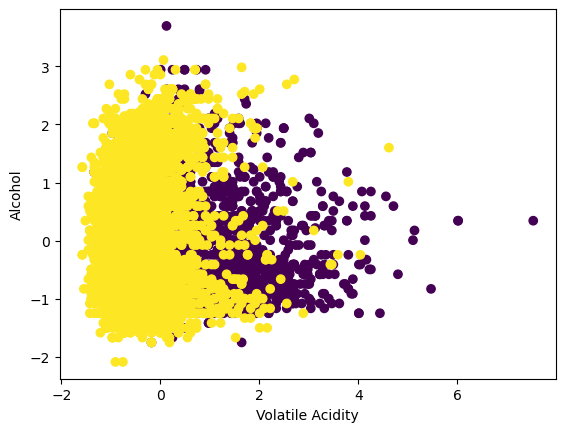

In [7]:
plt.scatter(X.iloc[:, 1], X.iloc[:,10], c=y)
plt.xlabel('Volatile Acidity')
plt.ylabel('Alcohol')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 40)

In [9]:
#Instantiate the model
model = Perceptron()
#Fit the model with data
model.fit(X_train, y_train, gamma=0.001, max_iter=1000)

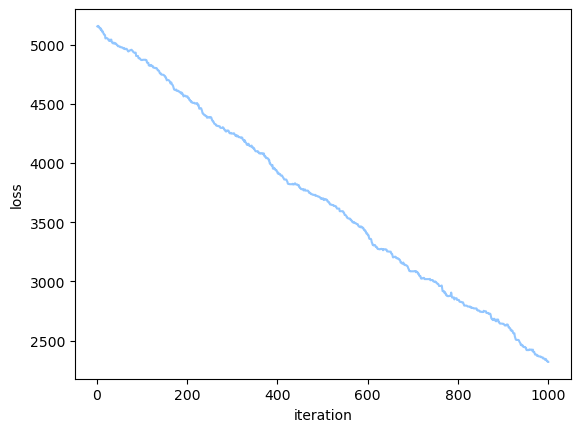

In [10]:
#Loss history during training
plt.plot(model.loss_history)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

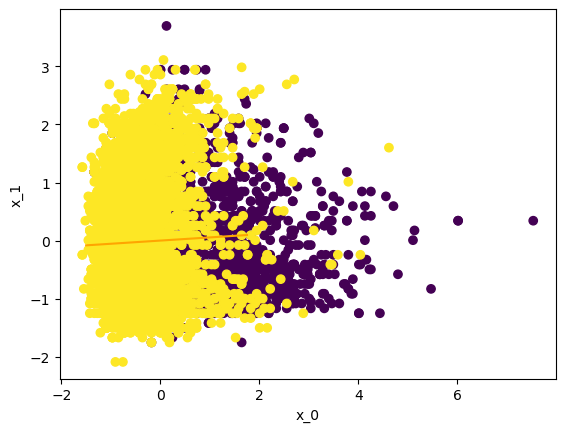

In [11]:
plt.scatter(X.iloc[:, 1], X.iloc[:,10], c=y, cmap='viridis')

domain = np.arange(-1.5, 2, 0.25)
w = model.weights
line = [-(w[1:2]*x)/w[0] for x in domain]

plt.plot(domain, line, label='separator', color = 'orange')
plt.xlabel('x_0')
plt.ylabel('x_1')
plt.show()

In [12]:
y_pred = model.prediction(X_train, model.weights)
print(f'Training accuracy score = {accuracy_score(y_train, y_pred)}')

y_pred_test = model.prediction(X_test, model.weights)
print(f'Test accuracy score = {accuracy_score(y_test, y_pred_test)}')

Training accuracy score = 0.5763546798029556
Test accuracy score = 0.5852307692307692
